In [345]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler, LabelEncoder

import importlib
import warnings


warnings.simplefilter('ignore')
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\machinelearning-Uve55_Wm-py3.11\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [346]:
df = pd.read_csv('5_titanic/titanic3.csv', sep=';')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [347]:
df[['age', 'fare']] = df[['age', 'fare']].replace(',', '.', regex=True).astype(float)

In [348]:
print('Размер набора данных до удаления дубликатов:', df.shape)

# Удалите дубликаты
df = df.drop_duplicates()

# Выведите размер набора данных после удаления дубликатов
print('Размер набора данных после удаления дубликатов:', df.shape)

Размер набора данных до удаления дубликатов: (1310, 14)
Размер набора данных после удаления дубликатов: (1310, 14)


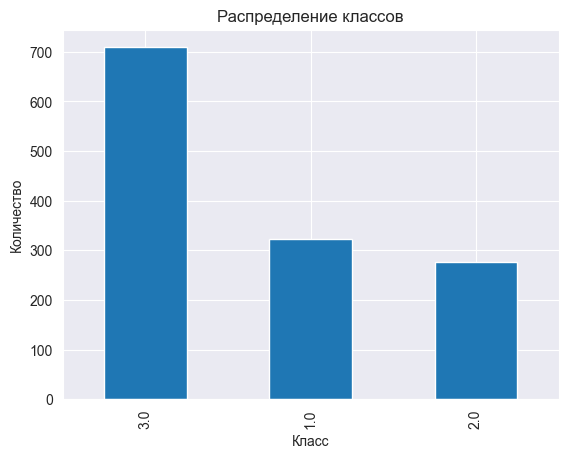

In [349]:
# Подсчет количества каждого класса
class_counts = df['pclass'].value_counts()

# Построение гистограммы
class_counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [350]:
# Так как данные несбалансированы (один класс имеет гораздо больше наблюдений, чем другой), то лучше использовать PR-кривую (Precision-Recall), так как ROC-кривая может давать оптимистичную оценку качества модели на несбалансированных данных.


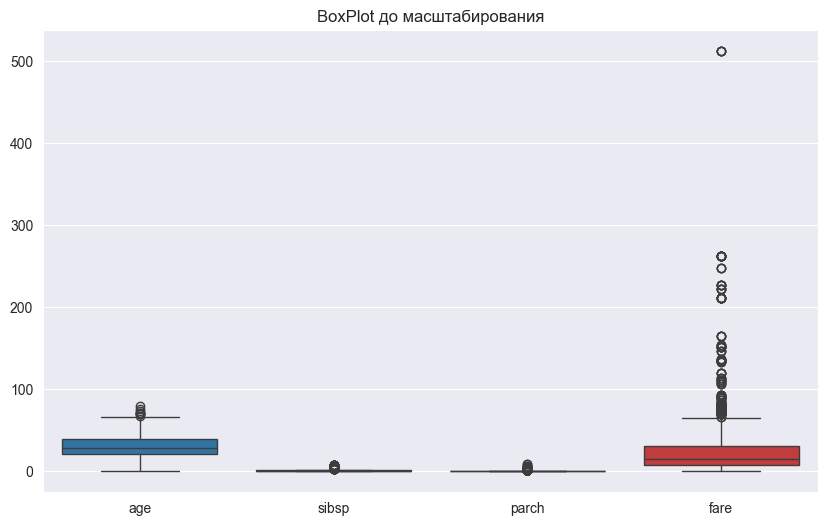

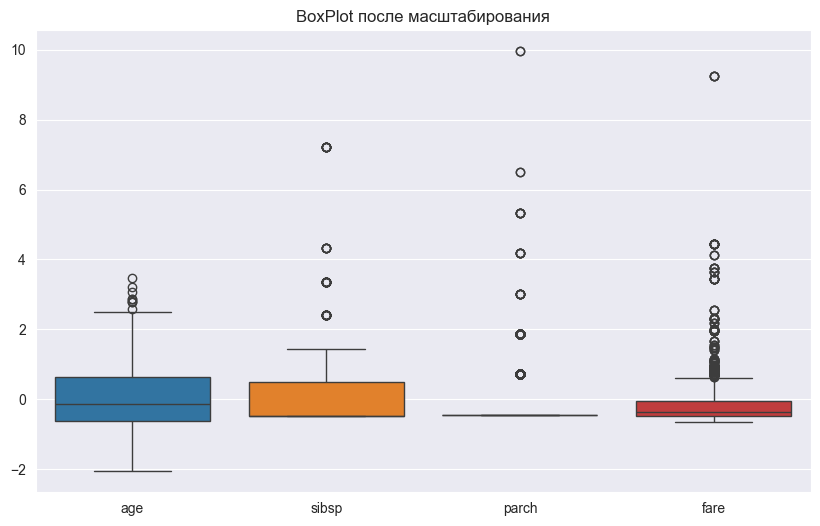

In [351]:
# Рассмотрим стандартизацию. Предположим, что к количественным признакам относятся age, sibsp, parch и fare.
# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

# Выбираем количественные признаки
quantitative_features = df[['age', 'sibsp', 'parch', 'fare']]

# Построение BoxPlot до масштабирования
plt.figure(figsize=(10, 6))
sns.boxplot(data=quantitative_features)
plt.title('BoxPlot до масштабирования')
plt.show()

# Применяем масштабирование
scaled_features = scaler.fit_transform(quantitative_features)
scaled_df = pd.DataFrame(scaled_features, columns=['age', 'sibsp', 'parch', 'fare'])

# Построение BoxPlot после масштабирования
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.title('BoxPlot после масштабирования')
plt.show()

In [352]:
df[['age', 'sibsp', 'parch', 'fare']] = scaled_features
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,-0.061162,-0.479087,-0.445000,24160,3.441165,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,-2.010496,0.481288,1.866526,113781,2.285603,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,-1.935302,0.481288,1.866526,113781,2.285603,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,0.008251,0.481288,1.866526,113781,2.285603,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,-0.338812,0.481288,1.866526,113781,2.285603,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,0.481288,-0.445000,2665,-0.364161,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,-0.234693,-0.479087,-0.445000,2656,-0.503886,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,-0.199987,-0.479087,-0.445000,2670,-0.503886,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,-0.061162,-0.479087,-0.445000,315082,-0.491323,NaN,S,NaN,NaN,NaN


In [353]:
df = pd.get_dummies(df, columns=['sex', 'embarked'])
df


,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",-0.061162,-0.479087,-0.445000,24160,3.441165,B5,2,NaN,"St Louis, MO",True,False,False,False,True
1,1.0,1.0,"Allison, Master. Hudson Trevor",-2.010496,0.481288,1.866526,113781,2.285603,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",False,True,False,False,True
2,1.0,0.0,"Allison, Miss. Helen Loraine",-1.935302,0.481288,1.866526,113781,2.285603,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.008251,0.481288,1.866526,113781,2.285603,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True,False,False,True
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",-0.338812,0.481288,1.866526,113781,2.285603,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",NaN,0.481288,-0.445000,2665,-0.364161,NaN,NaN,NaN,NaN,True,False,True,False,False
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",-0.234693,-0.479087,-0.445000,2656,-0.503886,NaN,NaN,304.0,NaN,False,True,True,False,False
1307,3.0,0.0,"Zakarian, Mr. Ortin",-0.199987,-0.479087,-0.445000,2670,-0.503886,NaN,NaN,NaN,NaN,False,True,True,False,False
1308,3.0,0.0,"Zimmerman, Mr. Leo",-0.061162,-0.479087,-0.445000,315082,-0.491323,NaN,NaN,NaN,NaN,False,True,False,False,True


In [354]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [355]:
df['home.dest']

0                          St Louis, MO
1       Montreal, PQ / Chesterville, ON
2       Montreal, PQ / Chesterville, ON
3       Montreal, PQ / Chesterville, ON
4       Montreal, PQ / Chesterville, ON
                     ...               
1305                                NaN
1306                                NaN
1307                                NaN
1308                                NaN
1309                                NaN
Name: home.dest, Length: 1310, dtype: object

In [356]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder и трансформация столбца 'home.dest'
df['home.dest'] = le.fit_transform(df['home.dest'].astype(str))
df

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",-0.061162,-0.479087,-0.445000,24160,3.441165,B5,2,NaN,308,True,False,False,False,True
1,1.0,1.0,"Allison, Master. Hudson Trevor",-2.010496,0.481288,1.866526,113781,2.285603,C22 C26,11,NaN,230,False,True,False,False,True
2,1.0,0.0,"Allison, Miss. Helen Loraine",-1.935302,0.481288,1.866526,113781,2.285603,C22 C26,NaN,NaN,230,True,False,False,False,True
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.008251,0.481288,1.866526,113781,2.285603,C22 C26,NaN,135.0,230,False,True,False,False,True
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",-0.338812,0.481288,1.866526,113781,2.285603,C22 C26,NaN,NaN,230,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",NaN,0.481288,-0.445000,2665,-0.364161,NaN,NaN,NaN,369,True,False,True,False,False
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",-0.234693,-0.479087,-0.445000,2656,-0.503886,NaN,NaN,304.0,369,False,True,True,False,False
1307,3.0,0.0,"Zakarian, Mr. Ortin",-0.199987,-0.479087,-0.445000,2670,-0.503886,NaN,NaN,NaN,369,False,True,True,False,False
1308,3.0,0.0,"Zimmerman, Mr. Leo",-0.061162,-0.479087,-0.445000,315082,-0.491323,NaN,NaN,NaN,369,False,True,False,False,True


In [357]:
df = df.drop(['name', 'body', 'boat', 'cabin', 'ticket'], axis=1)
correlation_matrix = df.corr()
print(correlation_matrix)

              pclass  survived       age     sibsp     parch      fare  \
pclass      1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629   
survived   -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265   
age        -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739   
sibsp       0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238   
parch       0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539   
fare       -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000   
home.dest   0.413583 -0.166342 -0.130851  0.066530  0.003325 -0.093576   
sex_female -0.124617  0.528693 -0.063646  0.109609  0.213125  0.185523   
sex_male    0.124617 -0.528693  0.063646 -0.109609 -0.213125 -0.185523   
embarked_C -0.269658  0.182123  0.085777 -0.048396 -0.008635  0.286269   
embarked_Q  0.230491 -0.016071 -0.019458 -0.048678 -0.100943 -0.130059   
embarked_S  0.096335 -0.154558 -0.075971  0.075198  0.073258 -0.172683   

            home.dest  sex_female  se

In [358]:
def find_highly_correlated_features(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

# использование функции
print(find_highly_correlated_features(df, 0.8))

['sex_male']


In [359]:
df = df.drop('sex_male', axis=1)
df

,pclass,survived,age,sibsp,parch,fare,home.dest,sex_female,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,-0.061162,-0.479087,-0.445000,3.441165,308,True,False,False,True
1,1.0,1.0,-2.010496,0.481288,1.866526,2.285603,230,False,False,False,True
2,1.0,0.0,-1.935302,0.481288,1.866526,2.285603,230,True,False,False,True
3,1.0,0.0,0.008251,0.481288,1.866526,2.285603,230,False,False,False,True
4,1.0,0.0,-0.338812,0.481288,1.866526,2.285603,230,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,NaN,0.481288,-0.445000,-0.364161,369,True,True,False,False
1306,3.0,0.0,-0.234693,-0.479087,-0.445000,-0.503886,369,False,True,False,False
1307,3.0,0.0,-0.199987,-0.479087,-0.445000,-0.503886,369,False,True,False,False
1308,3.0,0.0,-0.061162,-0.479087,-0.445000,-0.491323,369,False,False,False,True


In [360]:
missing_columns = df.columns[df.isnull().any()].tolist()
print(missing_columns)


['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']


In [361]:
# Для столбцов 'age' и 'fare', которые являются числовыми, используем медиану:
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


In [362]:
# Для столбцов 'pclass', 'survived', 'sibsp', и 'parch', которые являются категориальными или дискретными, используем моду(наиболее частое значение):
df['pclass'].fillna(df['pclass'].mode()[0], inplace=True)
df['survived'].fillna(df['survived'].mode()[0], inplace=True)
df['sibsp'].fillna(df['sibsp'].mode()[0], inplace=True)
df['parch'].fillna(df['parch'].mode()[0], inplace=True)

print(df.columns[df.isnull().any()].tolist())
df

[]


,pclass,survived,age,sibsp,parch,fare,home.dest,sex_female,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,-0.061162,-0.479087,-0.445000,3.441165,308,True,False,False,True
1,1.0,1.0,-2.010496,0.481288,1.866526,2.285603,230,False,False,False,True
2,1.0,0.0,-1.935302,0.481288,1.866526,2.285603,230,True,False,False,True
3,1.0,0.0,0.008251,0.481288,1.866526,2.285603,230,False,False,False,True
4,1.0,0.0,-0.338812,0.481288,1.866526,2.285603,230,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,-0.130574,0.481288,-0.445000,-0.364161,369,True,True,False,False
1306,3.0,0.0,-0.234693,-0.479087,-0.445000,-0.503886,369,False,True,False,False
1307,3.0,0.0,-0.199987,-0.479087,-0.445000,-0.503886,369,False,True,False,False
1308,3.0,0.0,-0.061162,-0.479087,-0.445000,-0.491323,369,False,False,False,True


In [363]:
df[['age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(df[['age', 'sibsp', 'parch', 'fare']])
df

,pclass,survived,age,sibsp,parch,fare,home.dest,sex_female,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,-0.038931,-0.478862,-0.444796,3.444003,308,True,False,False,True
1,1.0,1.0,-2.216698,0.481795,1.867437,2.287674,230,False,False,False,True
2,1.0,0.0,-2.132692,0.481795,1.867437,2.287674,230,True,False,False,True
3,1.0,0.0,0.038615,0.481795,1.867437,2.287674,230,False,False,False,True
4,1.0,0.0,-0.349118,0.481795,1.867437,2.287674,230,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,-0.116478,0.481795,-0.444796,-0.363846,369,True,True,False,False
1306,3.0,0.0,-0.232798,-0.478862,-0.444796,-0.503663,369,False,True,False,False
1307,3.0,0.0,-0.194025,-0.478862,-0.444796,-0.503663,369,False,True,False,False
1308,3.0,0.0,-0.038931,-0.478862,-0.444796,-0.491092,369,False,False,False,True


In [364]:
# 6 пункт

In [365]:
# подготовка данных

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Замените df, 'feature', и 'target' на ваши данные
X = df.drop('pclass', axis=1)
y = df['pclass']

# Если у вас более двух классов, преобразуйте y в бинарный формат
# y = label_binarize(y, classes=np.unique(y))

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Создайте экземпляр классификатора
knn = KNeighborsClassifier()

# Определите параметры для поиска
param_grid_knn = {'n_neighbors': list(range(1, 31))}

# Создайте экземпляр GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

# Обучите модель
grid_search_knn.fit(X_train, y_train)

# Выведите наилучшие параметры
print("Best parameters for KNN: ", grid_search_knn.best_params_)

Best parameters for KNN:  {'n_neighbors': 1}


In [367]:
# perceptron
from sklearn.linear_model import Perceptron

# Создайте экземпляр классификатора
perceptron = Perceptron()

# Определите параметры для поиска
param_grid_perceptron = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Создайте экземпляр GridSearchCV
grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=5)

# Обучите модель
grid_search_perceptron.fit(X_train, y_train)

# Выведите наилучшие параметры
print("Best parameters for Perceptron: ", grid_search_perceptron.best_params_)

Best parameters for Perceptron:  {'alpha': 0.0001}


In [368]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
# One-vs-Rest
ovr_knn = OneVsRestClassifier(knn)
ovr_knn.fit(X_train, y_train)

ovr_perceptron = OneVsRestClassifier(perceptron)
ovr_perceptron.fit(X_train, y_train)

# One-vs-One
ovo_knn = OneVsOneClassifier(knn)
ovo_knn.fit(X_train, y_train)

ovo_perceptron = OneVsOneClassifier(perceptron)
ovo_perceptron.fit(X_train, y_train)

OneVsOneClassifier(estimator=Perceptron())

In [369]:
# оценка точности классификации
from sklearn.metrics import accuracy_score

# Для One-vs-Rest
y_pred_ovr_knn = ovr_knn.predict(X_test)
print("Accuracy for One-vs-Rest KNN: ", accuracy_score(y_test, y_pred_ovr_knn))

y_pred_ovr_perceptron = ovr_perceptron.predict(X_test)
print("Accuracy for One-vs-Rest Perceptron: ", accuracy_score(y_test, y_pred_ovr_perceptron))

# Для One-vs-One
y_pred_ovo_knn = ovo_knn.predict(X_test)
print("Accuracy for One-vs-One KNN: ", accuracy_score(y_test, y_pred_ovo_knn))

y_pred_ovo_perceptron = ovo_perceptron.predict(X_test)
print("Accuracy for One-vs-One Perceptron: ", accuracy_score(y_test, y_pred_ovo_perceptron))

Accuracy for One-vs-Rest KNN:  0.7938931297709924
Accuracy for One-vs-Rest Perceptron:  0.5725190839694656
Accuracy for One-vs-One KNN:  0.8053435114503816
Accuracy for One-vs-One Perceptron:  0.6717557251908397


In [370]:
# Построение кривых PR и ROC
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

n_classes = len(y.unique())
print(n_classes)

# Для каждого класса
for i in range(n_classes):
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_ovo_knn)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_ovo_knn)
    plt.figure()
    plt.plot(recall, precision, label='PR curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

3


ValueError: multiclass format is not supported

In [372]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_ovo_knn)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: multilabel-indicator format is not supported